In [498]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_classification, make_moons
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

### Make Imbalanced Data

In [552]:
data = make_moons(n_samples=2000, noise=0.3, random_state=42)
df_moons = pd.DataFrame(data[0], columns=['x1','x2'])
df_moons['label'] = data[1]
df_moons.loc[df_moons.label == 1,:].sample(frac=0.05)
df_moons_reduced_target = df_moons.loc[df_moons.label == 1,:].sample(frac=0.05)
df_moons_imb = pd.concat([df_moons_reduced_target,df_moons.loc[df_moons.label == 0,:]], axis=0)

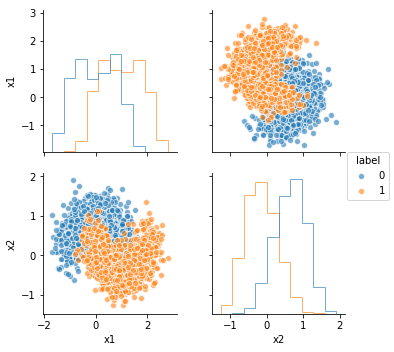

In [553]:
sns.pairplot(data=df_moons, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

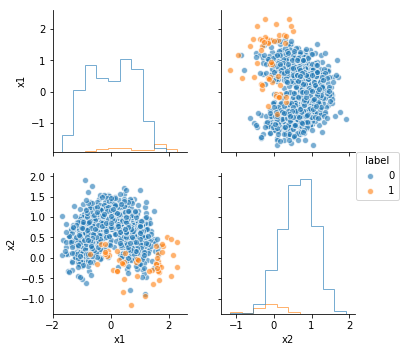

In [554]:
sns.pairplot(data=df_moons_imb, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

In [555]:
X_train, X_test, y_train, y_test = train_test_split(df_moons_imb.drop('label', axis=1), df_moons_imb.label,
                                                    stratify=df_moons_imb.label, test_size=0.2, random_state=42)

In [556]:
df_train = X_train.join(y_train)
df_test = X_test.join(y_test)

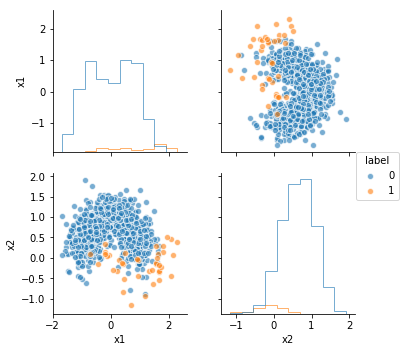

In [557]:
sns.pairplot(data=df_train, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

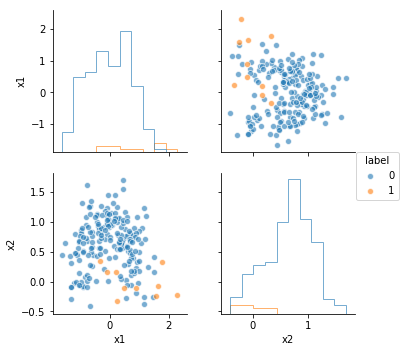

In [558]:
sns.pairplot(data=df_test, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

### Sampling Methods

#### Random UnderSampling

In [559]:
from imblearn.datasets import make_imbalance, fetch_datasets
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, AllKNN, CondensedNearestNeighbour
from imblearn.over_sampling import SMOTE 

In [560]:
ru = RandomUnderSampler(random_state=42)
data = ru.fit_sample(X_train, y_train)

In [561]:
df_ru = pd.DataFrame(data[0], columns=['x1', 'x2'])
df_ru['label'] = data[1]

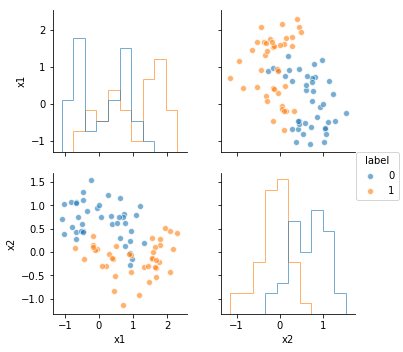

In [562]:
sns.pairplot(data=df_ru, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

#### All knn

In [563]:
aknn = AllKNN(random_state=42, n_neighbors=50, allow_minority=True )
data = aknn.fit_sample(X_train, y_train)

In [564]:
df_aknn = pd.DataFrame(data[0], columns=['x1', 'x2'])
df_aknn['label'] = data[1]

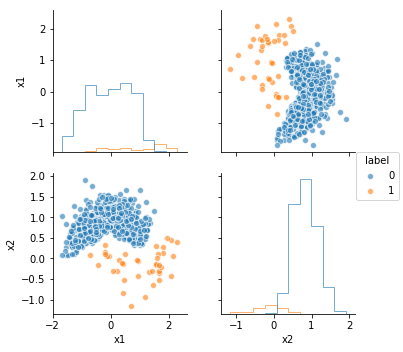

In [565]:
sns.pairplot(data=df_aknn, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

### Tomek Links

In [566]:
tl = TomekLinks(random_state=42, ratio='majority')
data = tl.fit_sample(X_train, y_train)

In [567]:
df_tl = pd.DataFrame(data[0], columns=['x1', 'x2'])
df_tl['label'] = data[1]

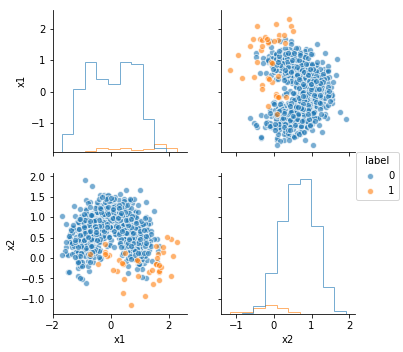

In [568]:
sns.pairplot(data=df_tl, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

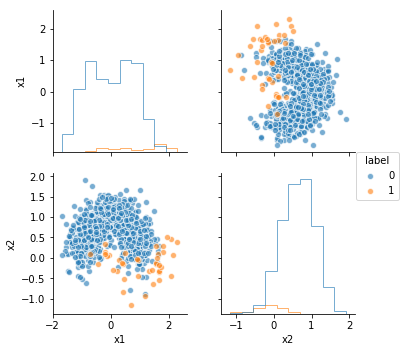

In [569]:
sns.pairplot(data=df_train, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

### Condensed Nearest Neighbors

In [570]:
cnn = CondensedNearestNeighbour(random_state=42)
data = cnn.fit_sample(X_train, y_train)

In [571]:
df_cnn = pd.DataFrame(data[0], columns=['x1', 'x2'])
df_cnn['label'] = data[1]

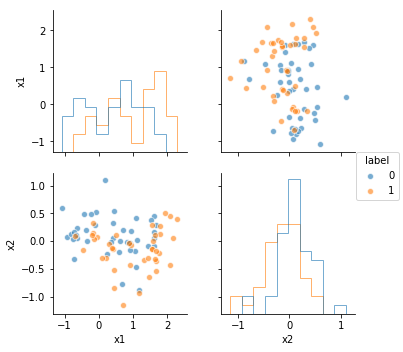

In [572]:
sns.pairplot(data=df_cnn, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

### Smote

In [573]:
smote = SMOTE(random_state=42, ratio='auto', k_neighbors=10, m_neighbors=5)
data = smote.fit_sample(X_train, y_train)

In [574]:
df_smote = pd.DataFrame(data[0], columns=['x1', 'x2'])
df_smote['label'] = data[1]

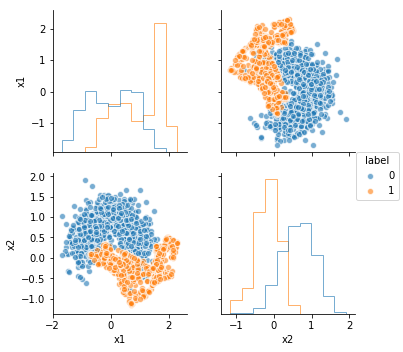

In [575]:
sns.pairplot(data=df_smote, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

#### Combine Smote and Tomek

In [576]:
from imblearn.combine import SMOTETomek, SMOTEENN

In [577]:
smotetl = SMOTETomek(random_state=42, ratio='auto', tomek=tl, smote=smote)
data = smotetl.fit_sample(X_train, y_train)

In [578]:
df_smotetl = pd.DataFrame(data[0], columns=['x1', 'x2'])
df_smotetl['label'] = data[1]

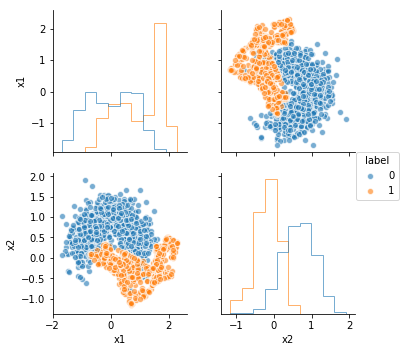

In [579]:
sns.pairplot(data=df_smotetl, hue='label', vars=['x1', 'x2'],
             diag_kws={'alpha': 0.6 ,"histtype": "step", "linewidth": 1}, plot_kws={'alpha': 0.6} )

### Classifier

In [580]:
from mlxtend.plotting import plot_decision_regions
from imblearn.metrics import classification_report_imbalanced,geometric_mean_score
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

from sklearn.svm import SVC

In [581]:
svc = SVC(probability=True, gamma='scale')
svc_smote = SVC(probability=True, gamma='scale')
svc_ru = SVC(probability=True, gamma='scale')
svc_smotetl = SVC(probability=True, gamma='scale')
svc_aknn = SVC(probability=True, gamma='scale')

In [582]:
## without sampling
svc.fit(X_train, y_train)
svc_smote.fit(df_smote.drop('label', axis=1), df_smote['label'])
svc_ru.fit(df_ru.drop('label', axis=1), df_ru['label'])
svc_smotetl.fit(df_smotetl.drop('label', axis=1), df_smotetl['label'])
svc_aknn.fit(df_aknn.drop('label', axis=1), df_aknn['label'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [583]:
y_proba = svc.predict_proba(X_test)

In [584]:
y_pred = svc.predict(X_test)

In [585]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.99      0.40      0.98      0.88      0.79       200
          1       0.80      0.40      0.99      0.53      0.88      0.76        10

avg / total       0.96      0.97      0.43      0.96      0.88      0.79       210



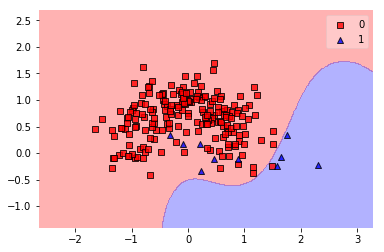

In [586]:
plot_decision_regions(X_test.values, y_test.values, svc)

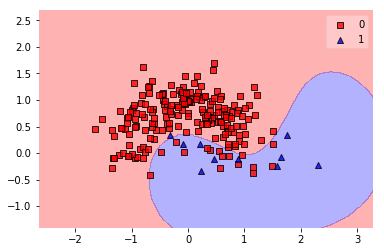

In [587]:
plot_decision_regions(X_test.values, y_test.values, svc_smote)

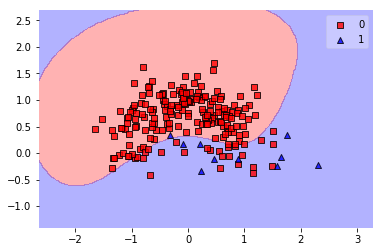

In [588]:
plot_decision_regions(X_test.values, y_test.values, svc_ru)

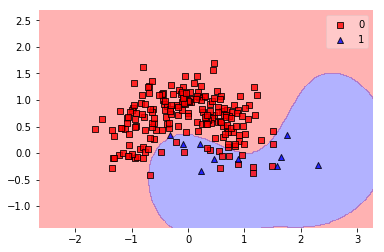

In [589]:
plot_decision_regions(X_test.values, y_test.values, svc_smotetl)

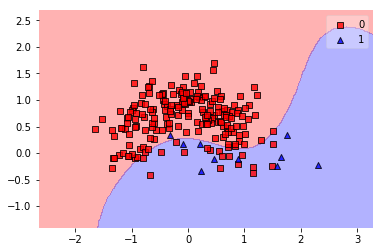

In [590]:
plot_decision_regions(X_test.values, y_test.values, svc_aknn)

In [591]:
y_pred = svc_smote.predict(X_test)

In [592]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.92      0.90      0.96      0.60      0.38       200
          1       0.36      0.90      0.92      0.51      0.60      0.34        10

avg / total       0.96      0.92      0.90      0.93      0.60      0.38       210



In [593]:
y_pred = svc_ru.predict(X_test)

In [594]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.87      0.90      0.93      0.51      0.27       200
          1       0.26      0.90      0.87      0.40      0.51      0.24        10

avg / total       0.96      0.87      0.90      0.90      0.51      0.27       210



In [595]:
y_pred = svc_smotetl.predict(X_test)

In [596]:
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.92      0.90      0.96      0.60      0.38       200
          1       0.36      0.90      0.92      0.51      0.60      0.34        10

avg / total       0.96      0.92      0.90      0.93      0.60      0.38       210



In [597]:
y_pred = svc_aknn.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.92      0.90      0.95      0.59      0.37       200
          1       0.35      0.90      0.92      0.50      0.59      0.32        10

avg / total       0.96      0.91      0.90      0.93      0.59      0.36       210



In [598]:
from pandas_pipeline_classes import helper

In [599]:
model_list = [
    ('smote', svc_smote),
    ('ru', svc_ru),
]

In [600]:
evalDict = helper.eval(model_list, X_test)

computing predictions for model smote

computing predictions for model ru



In [601]:
roc_dict = helper.roc_curve(evalDict, y_test)

computing fpr, tpr and thresholds for model smote
computing fpr, tpr and thresholds for model ru


In [602]:
roc_dict['ru']

[array([ 0.   ,  0.   ,  0.   ,  0.025,  0.025,  0.05 ,  0.05 ,  0.07 ,
         0.07 ,  0.075,  0.075,  0.165,  0.165,  1.   ]),
 array([ 0. ,  0.1,  0.4,  0.4,  0.6,  0.6,  0.7,  0.7,  0.8,  0.8,  0.9,
         0.9,  1. ,  1. ]),
 array([ 1.98048526,  0.98048526,  0.94346221,  0.89910637,  0.89272023,
         0.7775424 ,  0.76827874,  0.73002373,  0.71524372,  0.68135904,
         0.67588228,  0.28569548,  0.28523665,  0.00756953]),
 0.95899999999999996]

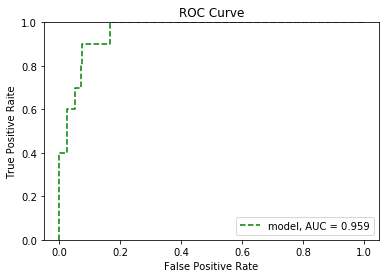

In [603]:
helper.plot_roc_curve(roc_dict['ru'][0],roc_dict['ru'][1],roc_dict['ru'][3] )

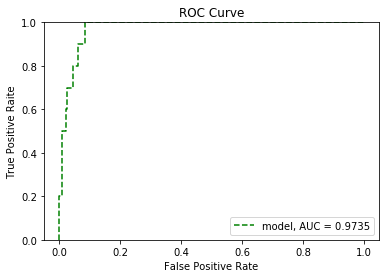

In [604]:
helper.plot_roc_curve(roc_dict['smote'][0],roc_dict['smote'][1],roc_dict['smote'][3] )